# **TP 2: Support vector machines**

KALMOGO Benjamin

In [247]:
import pandas as pd
import matplotlib.pyplot as plt


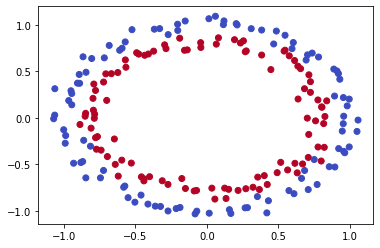

In [248]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TASS/data/darts.csv')
X = df[['x_coord', 'y_coord']]
y = df['class']
plt.scatter(X['x_coord'], X['y_coord'],
c=y, cmap=plt.cm.coolwarm)
plt.show()

#Exercise 1a

Les donnees ne sont pas lineairement separable , car visiblement le nuage de point observer presente des donnees en forme d'anneau, donc impossible de les separe en deux partie.

In [249]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X,y)
result = model.score(X,y)
print(result)

0.505


#Exercise 1b What score do you get? Does this confirm your intuitions?

**Exercise 1b What score do you get? Does this confirm your intuitions?**

On a obtenu un score de 50,5% ce qui comfirme bien nos intuition, cela correspond a une simple separation de l'anneau par une droite.

In [250]:
import matplotlib.pyplot as plt
import numpy as np


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_decision(clf, X0, X1, y, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    xx, yy = make_meshgrid(X0, X1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, **params)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm)
    return None

def show_example_faces(faces):    
    fig, ax = plt.subplots(3, 5)
    for i, axi in enumerate(ax.flat):
        axi.imshow(faces.images[i], cmap='bone')
        axi.set(xticks=[], yticks=[],
                xlabel=faces.target_names[faces.target[i]])
    return None
    
def show_example_face_classified(faces, X_test, y_test, y_fit):
    fig, ax = plt.subplots(4, 6)
    for i, axi in enumerate(ax.flat):
        axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(faces.target_names[y_fit[i]].split()[-1],
                       color='black' if y_fit[i] == y_test[i] else 'red')
    fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);
    return None

In [251]:
# import sys  
# sys.path.insert(0, '.')
# import svmtools
# svmtools.plot_decision(model, X['x_coord'], X['y_coord'], y)
# plt.show()

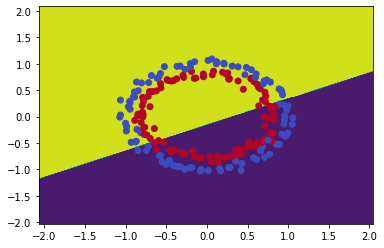

In [252]:
plot_decision(model, X['x_coord'], X['y_coord'], y)
plt.show()

#Exercise 2a

In [253]:
model = svm.SVC(kernel='rbf')
model.fit(X,y)
result = model.score(X,y)
print(result)

0.97


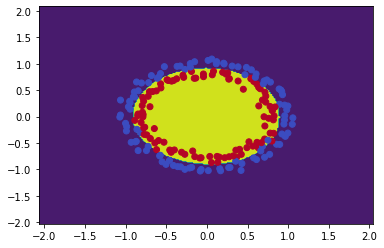

In [254]:
plot_decision(model, X['x_coord'], X['y_coord'], y)
plt.show()

#Avec un noyeau nonlineaire on a un score de 97% mieux que le premier et le perimetre de decision ressemble a un plan.

#Exercise 2b

In [255]:
model = svm.SVC(kernel='rbf',gamma=299)
model.fit(X,y)
result = model.score(X,y)
print(result)

1.0


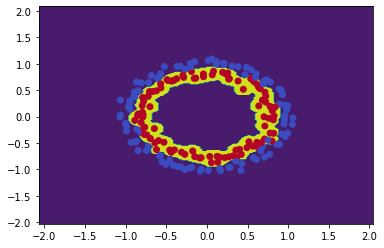

In [256]:
plot_decision(model, X['x_coord'], X['y_coord'], y)
plt.show()

# On remaque que plus la valeure de gamma augmente plus le taux de bonne classification augmente egalement.Cela diminue le perimetre de de couleure jeaune et la meilleure valeure trouver pour gamma est gamma=299 pour un score de 100%

#Exercise 2c

In [257]:
model = svm.SVC(kernel='rbf',gamma=10,C=5100)
model.fit(X,y)
result = model.score(X,y)
print(result)

1.0


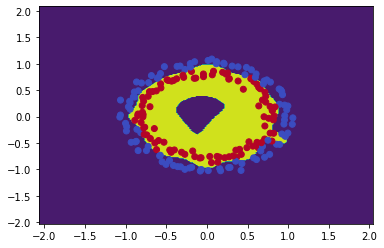

In [258]:

plot_decision(model, X['x_coord'], X['y_coord'], y)
plt.show()

#On remaque que plus la valeure de C augmente plus le taux de bonne classification augmente egalement.Cela diminue le perimetre de de couleure jeaune afin de ne contenir que les point rouge et la meilleure valeure trouver pour C est C=5100 pour un score de 100%

#3 Face recognition (reconnaissance de visage)

In [259]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [260]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

We can explore some data characteristics using the following commands:

In [261]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


#What does the shape characteristic represent?
on a une taille d'échantillons de 1348, et  Chaque ligne correspond à une image de visage de taille originale 62 x 47 pixels.

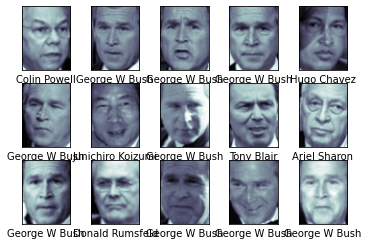

In [262]:
#import svmtools
# svmtools.show_example_faces(faces)
show_example_faces(faces)
plt.show()



In [263]:
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target,
test_size=0.1,
random_state=42)

#PCA

In [264]:
pca = PCA(n_components=150,whiten=True,svd_solver='randomized',random_state=42)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#SVM classifier on our training

In [265]:
model = SVC(kernel='rbf',C=1000, gamma=0.003)
model.fit(X_train_pca, y_train)
score = model.score(X_test_pca, y_test)
print(score)

0.8592592592592593


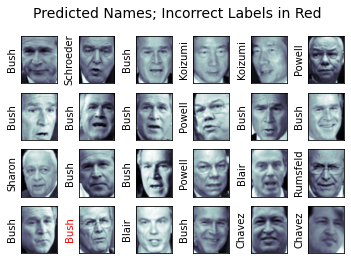

In [266]:
y_fit = model.predict(X_test_pca)
show_example_face_classified(faces, X_test, y_test, y_fit)
plt.show()

#Exercise 3b
les parametre suvant donne une prediction satisfaisante avec une seule image male reconnue.C=1000, gamma=0.003

#Exercise 4

In [267]:
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target,
test_size=0.2,
random_state=42)

In [268]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
y_test,
test_size=0.5,
random_state=42)

#separation en validation_set et test_set

In [270]:
pca = PCA(n_components=150,whiten=True,svd_solver='randomized',random_state=42)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca=pca.transform(X_val) 

#Apprentissage sur le trainning et validation  sur le validation_set

In [276]:
model = SVC(kernel='rbf',C=1000, gamma=0.002)
model.fit(X_train_pca, y_train)
score = model.score(X_val_pca, y_val)
print(score)

0.837037037037037


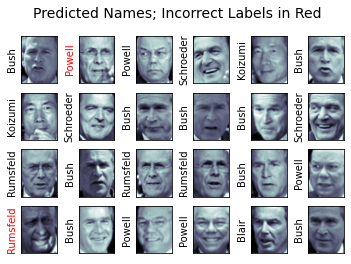

In [277]:
y_fit = model.predict(X_val_pca)
show_example_face_classified(faces, X_val, y_val, y_fit)
plt.show()

#Test

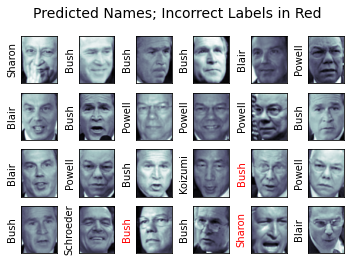

In [278]:


y_fit = model.predict(X_test_pca)
show_example_face_classified(faces, X_test, y_test, y_fit)
plt.show()

In [279]:
score = model.score(X_test_pca, y_test)
print("un score de test_set de : ",score)

un score de test_set de :  0.8814814814814815


#On a un score final de 88,14% et il est different de celui d'apprentissage(meilleur)

#K-fold cross validation

In [288]:
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target,
test_size=0.2,
random_state=42)

In [289]:
pca = PCA(n_components=150,whiten=True,svd_solver='randomized',random_state=42)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [290]:
from sklearn.model_selection import cross_val_score,KFold

In [291]:
cv = KFold(10)

In [292]:
cross_val_score (SVC(kernel='rbf',C=1000, gamma=0.002),X_train_pca,y_train,cv=cv).mean()

0.8274316372447214

In [293]:
model = SVC(kernel='rbf',C=1000, gamma=0.002)
model.fit(X_train_pca, y_train)
score = model.score(X_test_pca, y_test)
print(score)

0.8592592592592593


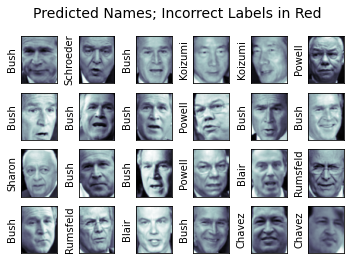

In [294]:
y_fit = model.predict(X_test_pca)
show_example_face_classified(faces, X_test, y_test, y_fit)
plt.show()

#on a score de 85% avec toutes ;es image bien predite.